# EDA

### Explore data distributions, cleaning, and feature engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order_df = pd.read_csv("../data/orders.csv")
customer_df = pd.read_csv("../data/customers.csv")
product_df = pd.read_csv("../data/products.csv")

## Products EDA

In [4]:
product_df.head()

,product_id,product_brand,product_name,product_description,product_price,product_category,product_subcategory
0,1,Luxor,Luxor Designer T-Shirt,High-quality cotton designer t-shirt with uniq...,79.99,Clothing,T-shirts
1,2,Hermanos,Classic Cotton T-Shirt,Durable cotton t-shirt in various colors,24.99,Clothing,T-shirts
2,3,Daily Value,Basic Tee,Affordable and comfortable basic t-shirt,9.99,Clothing,T-shirts
3,4,Luxor,Luxor Tailored Pants,Luxury tailored pants with fine stitching and ...,129.99,Clothing,Pants
4,5,Hermanos,Chino Pants,Stylish chino pants for casual and business wear,49.99,Clothing,Pants


In [6]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           30 non-null     int64  
 1   product_brand        30 non-null     object 
 2   product_name         30 non-null     object 
 3   product_description  30 non-null     object 
 4   product_price        30 non-null     float64
 5   product_category     30 non-null     object 
 6   product_subcategory  30 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.8+ KB


In [7]:
product_df.describe()

,product_id,product_price
count,30.000000,30.000000
mean,15.500000,229.053333
std,8.803408,511.935913
min,1.000000,0.890000
25%,8.250000,6.990000
50%,15.500000,37.990000
75%,22.750000,182.490000
max,30.000000,2499.990000


### Distributions

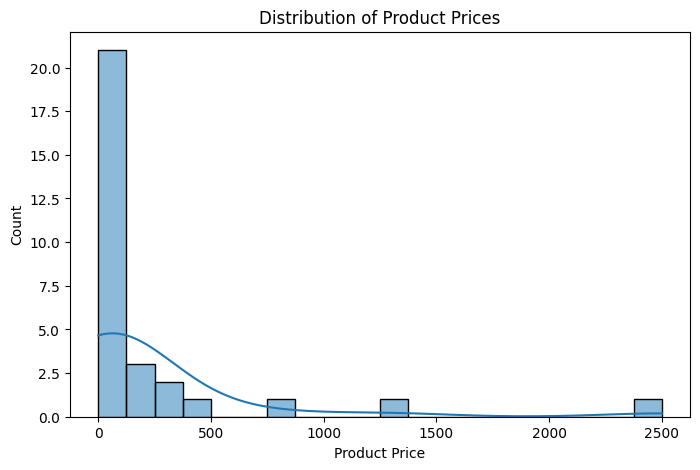

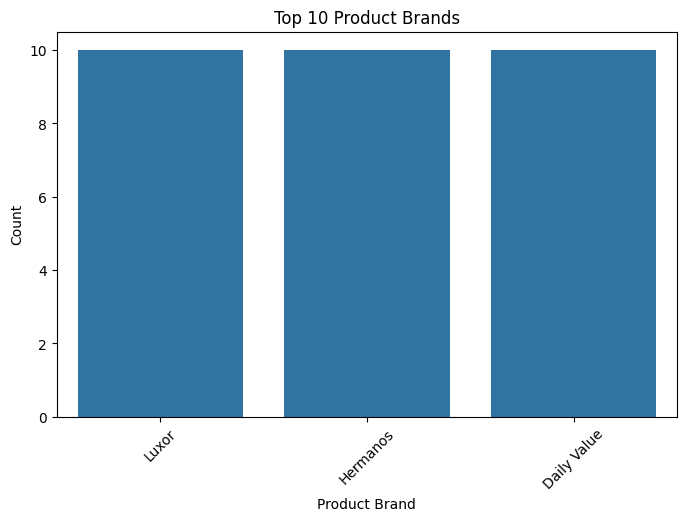

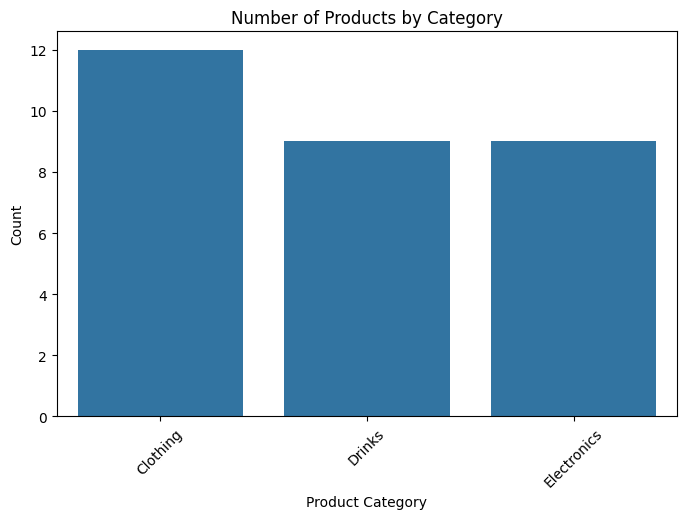

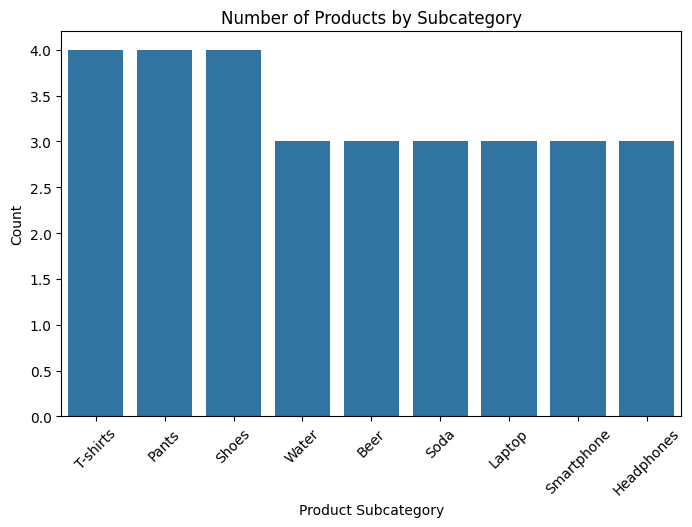

In [11]:
# Plot distribution of product prices
plt.figure(figsize=(8, 5))
sns.histplot(product_df['product_price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Count')
plt.show()

# Plot count of products by brand
plt.figure(figsize=(8, 5))
top_brands = product_df['product_brand'].value_counts().nlargest(10).index
sns.countplot(data=product_df[product_df['product_brand'].isin(top_brands)], x='product_brand', order=top_brands)
plt.title('Top 10 Product Brands')
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot count of products by category
plt.figure(figsize=(8, 5))
sns.countplot(data=product_df, x='product_category', order=product_df['product_category'].value_counts().index)
plt.title('Number of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot count of products by category
plt.figure(figsize=(8, 5))
sns.countplot(data=product_df, x='product_subcategory', order=product_df['product_subcategory'].value_counts().index)
plt.title('Number of Products by Subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### Data Quality

Conclusion: No data issues found.

In [13]:
# Check for missing values
print(product_df.isnull().sum())

product_id             0
product_brand          0
product_name           0
product_description    0
product_price          0
product_category       0
product_subcategory    0
dtype: int64


In [14]:
# Check for duplicates
print(product_df.duplicated().sum())

0


In [22]:
# Check for price less than 0
negative_prices = product_df[product_df['product_price'] < 0]
print(f"Number of products with price less than 0: {len(negative_prices)}")
# if not negative_prices.empty:
    # print(negative_prices)

negative_prices

Number of products with price less than 0: 0


,product_id,product_brand,product_name,product_description,product_price,product_category,product_subcategory


In [ ]:
# Check for price greater than 1000
high_prices = product_df[product_df['product_price'] > 1000]
print(f"Number of products with price greater than 1000: {len(high_prices)}")
high_prices

Number of products with price greater than 1000: 2


,product_id,product_brand,product_name,product_description,product_price,product_category,product_subcategory
18,19,Luxor,Luxor Ultra Laptop,High-performance luxury laptop for professionals,2499.99,Electronics,Laptop
21,22,Luxor,Luxor Pro Smartphone,High-end smartphone with exceptional camera,1299.99,Electronics,Smartphone


In [26]:
# Check prices for "Laptop" subcategory
product_df[product_df['product_subcategory'] == 'Laptop']

,product_id,product_brand,product_name,product_description,product_price,product_category,product_subcategory
18,19,Luxor,Luxor Ultra Laptop,High-performance luxury laptop for professionals,2499.99,Electronics,Laptop
19,20,Hermanos,Mid-Range Laptop,Balanced performance laptop for work and play,799.99,Electronics,Laptop
20,21,Daily Value,Budget Laptop,Functional laptop for everyday tasks,299.99,Electronics,Laptop


In [28]:
# Check prices for "Smartphone" subcategory
product_df[product_df['product_subcategory'] == 'Smartphone']

,product_id,product_brand,product_name,product_description,product_price,product_category,product_subcategory
21,22,Luxor,Luxor Pro Smartphone,High-end smartphone with exceptional camera,1299.99,Electronics,Smartphone
22,23,Hermanos,Smartphone Plus,Feature-rich smartphone at a reasonable price,499.99,Electronics,Smartphone
23,24,Daily Value,Budget Smartphone,Basic smartphone with essential features,199.99,Electronics,Smartphone


## Customers EDA

In [30]:
customer_df.head()

,customer_id,customer_city,customer_state,customer_zip,customer_country,customer_gender,customer_age,customer_class_quartile,customer_description
0,1,Los Angeles,CA,90001,USA,Female,34,Upper Middle 50-75%,"Marketing Manager living in LA, enjoys outdoor..."
1,2,New York,NY,10001,USA,Male,45,Top 25%,"Finance executive from NYC, loves gourmet food..."
2,3,Miami,FL,33101,USA,Female,29,Lower Middle 25-50%,"Blogger based in Miami, passionate about fashi..."
3,4,San Francisco,CA,94101,USA,Other,26,Upper Middle 50-75%,"Tech startup founder, into innovation and design."
4,5,Brooklyn,NY,11201,USA,Male,38,Top 25%,"Art curator in Brooklyn, enjoys visiting galle..."


In [31]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              100 non-null    int64 
 1   customer_city            100 non-null    object
 2   customer_state           100 non-null    object
 3   customer_zip             100 non-null    int64 
 4   customer_country         100 non-null    object
 5   customer_gender          100 non-null    object
 6   customer_age             100 non-null    int64 
 7   customer_class_quartile  100 non-null    object
 8   customer_description     100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


In [32]:
customer_df.describe()

,customer_id,customer_zip,customer_age
count,100.000000,100.000000,100.000000
mean,50.500000,53067.110000,36.900000
std,29.011492,34207.368923,9.341447
min,1.000000,7101.000000,22.000000
25%,25.750000,32213.250000,29.000000
50%,50.500000,33601.500000,36.000000
75%,75.250000,90501.000000,43.250000
max,100.000000,95816.000000,60.000000


### Distributions

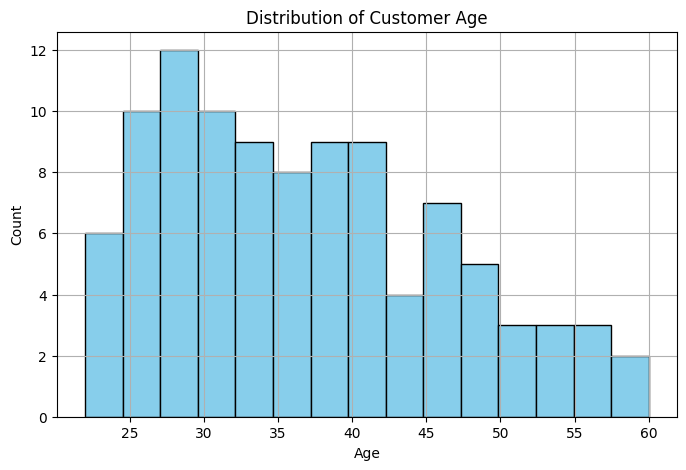

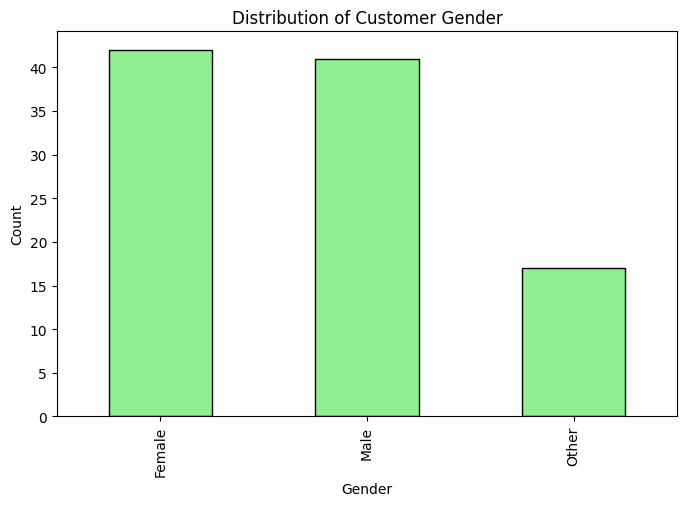

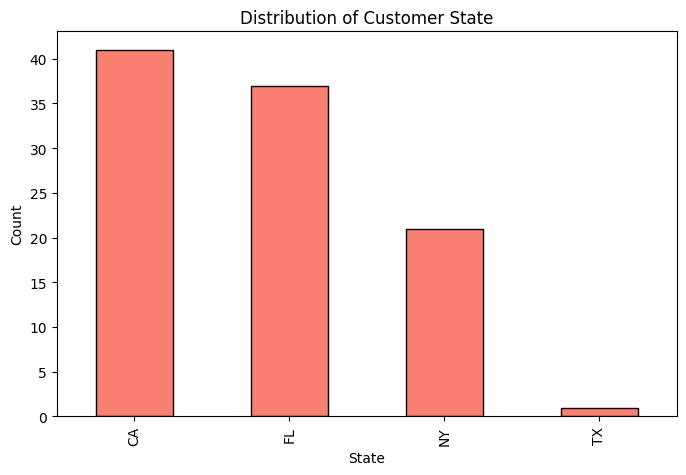

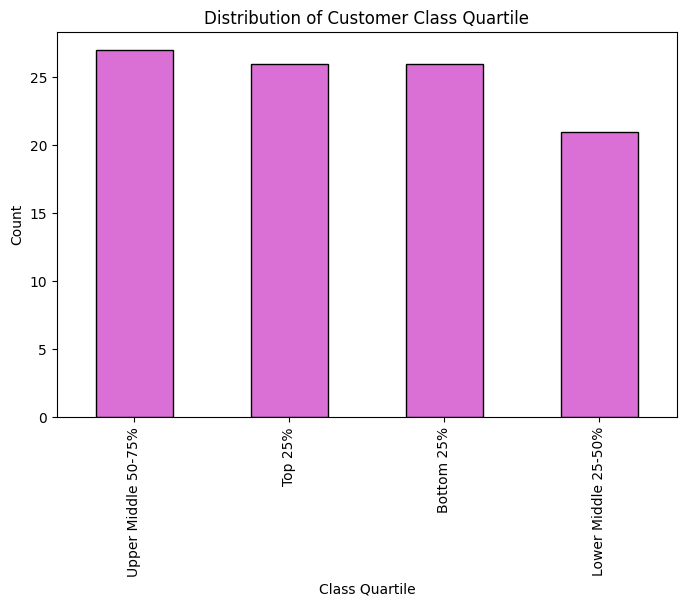

In [34]:
# Plot distribution of customer_age
plt.figure(figsize=(8, 5))
customer_df['customer_age'].astype(float).hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot distribution of customer_gender
plt.figure(figsize=(8, 5))
customer_df['customer_gender'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot distribution of customer_state
plt.figure(figsize=(8, 5))
customer_df['customer_state'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Customer State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

# Plot distribution of customer_class_quartile
plt.figure(figsize=(8, 5))
customer_df['customer_class_quartile'].value_counts().plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Distribution of Customer Class Quartile')
plt.xlabel('Class Quartile')
plt.ylabel('Count')
plt.show()




### Data Quality

Conclusion: No data issues found.

In [35]:
# Check for missing values
print(customer_df.isnull().sum())

customer_id                0
customer_city              0
customer_state             0
customer_zip               0
customer_country           0
customer_gender            0
customer_age               0
customer_class_quartile    0
customer_description       0
dtype: int64


In [ ]:
# Check for duplicates
print(customer_df.duplicated().sum())

0


In [ ]:
# Check for age less than 0
negative_age = customer_df[customer_df['customer_age'] < 0]
print(f"Number of customers with age less than 0: {len(negative_age)}")
negative_age

Number of customers with age less than 0: 0


,customer_id,customer_city,customer_state,customer_zip,customer_country,customer_gender,customer_age,customer_class_quartile,customer_description


In [ ]:
# Check for age greater than 85
high_age = customer_df[customer_df['customer_age'] > 85]
print(f"Number of customers with age less than 0: {len(high_age)}")
high_age

Number of customers with age less than 0: 0


,customer_id,customer_city,customer_state,customer_zip,customer_country,customer_gender,customer_age,customer_class_quartile,customer_description


### Orders EDA

In [42]:
order_df.head()

,order_id,order_seq_nbr,customer_id,product_id,order_date
0,1,1,1,1,2021-10-15
1,2,1,1,3,2021-10-15
2,3,1,2,2,2021-10-16
3,4,1,2,4,2021-10-16
4,5,1,3,5,2021-10-17


In [43]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       2171 non-null   int64 
 1   order_seq_nbr  2171 non-null   int64 
 2   customer_id    2171 non-null   int64 
 3   product_id     2171 non-null   int64 
 4   order_date     2171 non-null   object
dtypes: int64(4), object(1)
memory usage: 84.9+ KB


In [44]:
order_df.describe()

,order_id,order_seq_nbr,customer_id,product_id
count,2171.000000,2171.000000,2171.000000,2171.000000
mean,1086.000000,6.656840,37.487333,14.863197
std,626.858038,8.577737,29.158698,8.738557
min,1.000000,1.000000,1.000000,1.000000
25%,543.500000,1.000000,13.000000,7.000000
50%,1086.000000,1.000000,28.000000,14.000000
75%,1628.500000,12.000000,61.000000,22.000000
max,2171.000000,29.000000,100.000000,40.000000


### Distributions

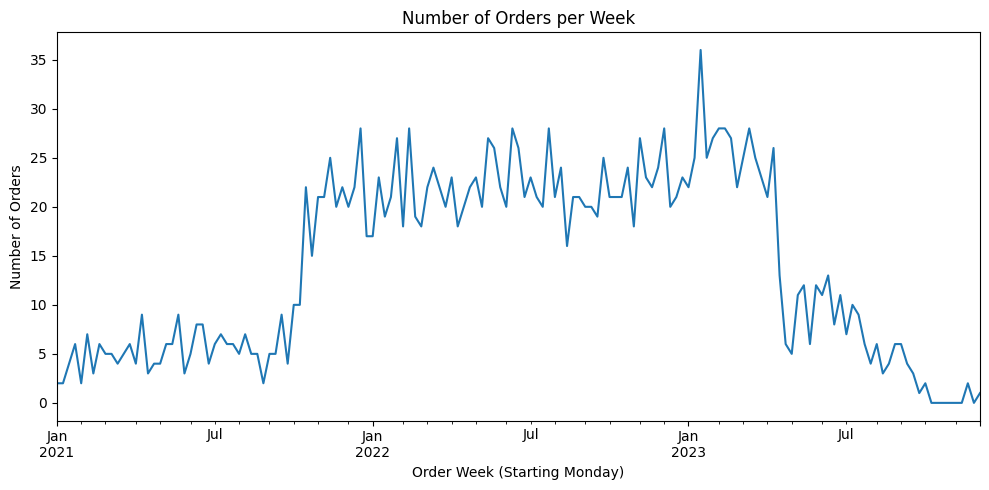

In [ ]:
# Ensure order_date is datetime
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Group by order_date (weekly) and count number of orders per week
orders_per_week = order_df.resample('W-MON', on='order_date').size()

plt.figure(figsize=(10, 5))
orders_per_week.plot()
plt.title('Number of Orders per Week')
plt.xlabel('Order Week (Starting Monday)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### Data Quality

Conclusion: No data issues found.

In [47]:
# Check for missing values
print(order_df.isnull().sum())

order_id         0
order_seq_nbr    0
customer_id      0
product_id       0
order_date       0
dtype: int64


In [48]:
# Check for duplicates
print(order_df.duplicated().sum())

0


In [53]:
# Check for orders by the same customer on the same day
duplicate_orders = order_df.duplicated(subset=['customer_id', 'order_date'], keep=False)
duplicates_df = order_df[duplicate_orders].sort_values(['customer_id', 'order_date'])
print(f"Number of duplicate orders by the same customer on the same day: {duplicates_df.shape[0]}")
duplicates_df

Number of duplicate orders by the same customer on the same day: 1121


,order_id,order_seq_nbr,customer_id,product_id,order_date
1085,1086,1,1,3,2021-10-12
1086,1087,2,1,9,2021-10-12
0,1,1,1,1,2021-10-15
1,2,1,1,3,2021-10-15
200,201,1,1,21,2022-01-23
...,...,...,...,...,...
599,600,1,100,30,2022-08-10
798,799,1,100,19,2022-11-18
799,800,1,100,20,2022-11-18
998,999,1,100,9,2023-02-26


In [ ]:
# Check for duplicate orders by the same customer on the same day
duplicate_orders = order_df.duplicated(subset=['customer_id', 'order_date', 'product_id'], keep=False)
duplicates_df = order_df[duplicate_orders].sort_values(['customer_id', 'order_date'])
print(f"Number of duplicate orders by the same customer on the same day: {duplicates_df.shape[0]}")
duplicates_df

Number of duplicate orders by the same customer on the same day: 2


,order_id,order_seq_nbr,customer_id,product_id,order_date
1400,1401,3,4,20,2023-07-06
1461,1462,5,4,20,2023-07-06


In [56]:
# The only duplicate order is for a "Mid-Range Laptop" at $799.99
product_df.iloc[19]

product_id                                                        20
product_brand                                               Hermanos
product_name                                        Mid-Range Laptop
product_description    Balanced performance laptop for work and play
product_price                                                 799.99
product_category                                         Electronics
product_subcategory                                           Laptop
Name: 19, dtype: object

In [58]:
# The customer that bought two laptops on the same day has an above average income and is tech focused, so it's plausible
customer_df.iloc[3]

customer_id                                                                4
customer_city                                                  San Francisco
customer_state                                                            CA
customer_zip                                                           94101
customer_country                                                         USA
customer_gender                                                        Other
customer_age                                                              26
customer_class_quartile                                  Upper Middle 50-75%
customer_description       Tech startup founder, into innovation and design.
Name: 3, dtype: object